In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline


## Step 1: Loading the data set and looking at summary level information

In [7]:
conversionDataFrame = pd.read_csv("conversion_data.csv")

In [10]:
conversionDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
country                316200 non-null object
age                    316200 non-null int64
new_user               316200 non-null int64
source                 316200 non-null object
total_pages_visited    316200 non-null int64
converted              316200 non-null int64
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [17]:
conversionDataFrame.describe(include="all")

,country,age,new_user,source,total_pages_visited,converted
count,316200,316200.000000,316200.000000,316200,316200.000000,316200.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,178092,NaN,NaN,155040,NaN,NaN
mean,NaN,30.569858,0.685465,NaN,4.872966,0.032258
std,NaN,8.271802,0.464331,NaN,3.341104,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [52]:
conversionDataFrame.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [59]:
conversionDataFrame["country"].value_counts()

US         178092
China       76602
UK          48449
Germany     13055
Name: country, dtype: int64

In [60]:
conversionDataFrame["source"].value_counts()

Seo       155039
Ads        88739
Direct     72420
Name: source, dtype: int64

In [91]:
conversionDataFrame["age"].value_counts()

30    14346
28    14341
29    14158
27    14084
26    13931
31    13692
32    13507
25    13460
24    12960
33    12631
23    12336
34    12108
22    11701
35    11471
21    10966
36    10779
20    10156
37     9761
19     9349
38     8970
18     8466
39     8202
17     7597
40     7148
41     6401
42     5588
43     4904
44     4224
45     3634
46     2994
47     2504
48     2121
49     1629
50     1356
51     1093
52      935
53      627
54      520
55      394
56      286
57      247
58      165
59      127
60       94
61       71
62       59
63       35
64       27
65       15
66        9
67        5
68        5
69        3
70        2
73        1
77        1
72        1
79        1
Name: age, dtype: int64

## Step 2: Removing outliers/bad data based on age

In [ ]:
#Look at the number of users in the outlier ages
conversionDataFrame["age"].value_counts().loc[[111, 123]] 

In [58]:
#There are only two, so let's just remove them from the data set
conversionDataFrame = conversionDataFrame[conversionDataFrame["age"] < 100]

## Step 3: Exploring Conversion Rate

First, let's look at the overall conversion rate for the data...

In [55]:
meanConversionRate = conversionDataFrame['converted'].mean()
meanConversionRate

0.03225806451612903

Next, let's look at conversion rate by country...

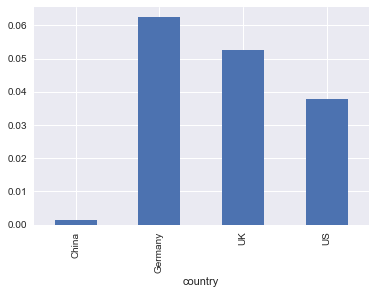

In [71]:
conversionDataFrame.groupby(["country"])["converted"].mean().plot(kind="bar")

Conversion rate varies significantly by country - it is extremely low in China! 

Let's look at conversion rate relative to number of pages visitied...

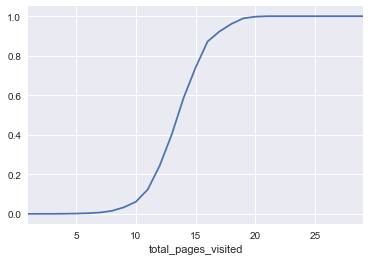

In [74]:
conversionDataFrame.groupby(["total_pages_visited"])["converted"].mean().plot()

Unsurprisingly, conversion rate increases as a function of pages visited.  Specifically, conversion rate dramatically increases in the 10-20 visited pages range.  

Let's look at conversion rate by age...

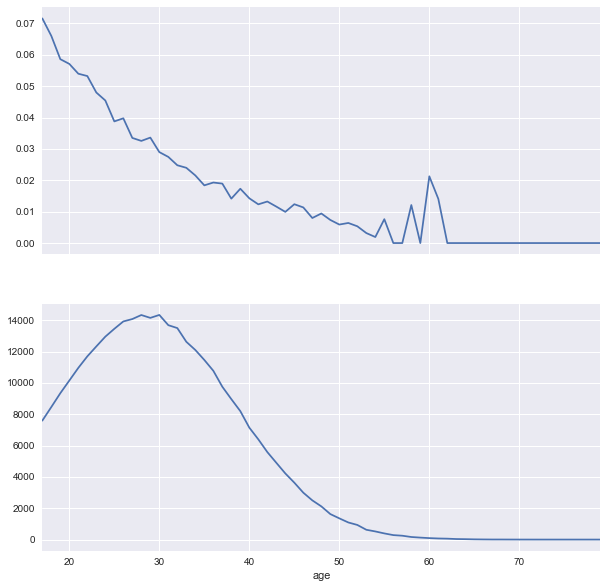

In [89]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
conversionDataFrame.groupby(["age"])["converted"].mean().plot(ax=ax[0])
conversionDataFrame.groupby(["age"])["converted"].count().plot(ax=ax[1])

Generally, conversion rate is monotonically decreasing by age.  There are some spikes in the 60s.  This could be due to small sample size/randomness or from something more fundamental like targetted ads and could be examined.  We could look at the standard deviation/distribution of that age range to try to get a sense.

Let's look at conversion rate by source...

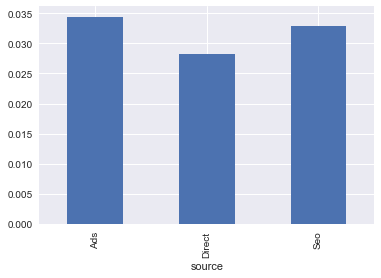

In [92]:
conversionDataFrame.groupby(["source"])["converted"].mean().plot(kind="bar")

Let's look at conversion rate by whether they became a new user

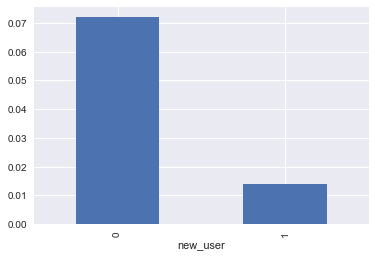

In [93]:
conversionDataFrame.groupby(["new_user"])["converted"].mean().plot(kind="bar")

Users that alread have an account have a much higher conversion rate!

Finally, let's look at the data across all the metrics separated by country in order to see if there are any interesting trends within countries...

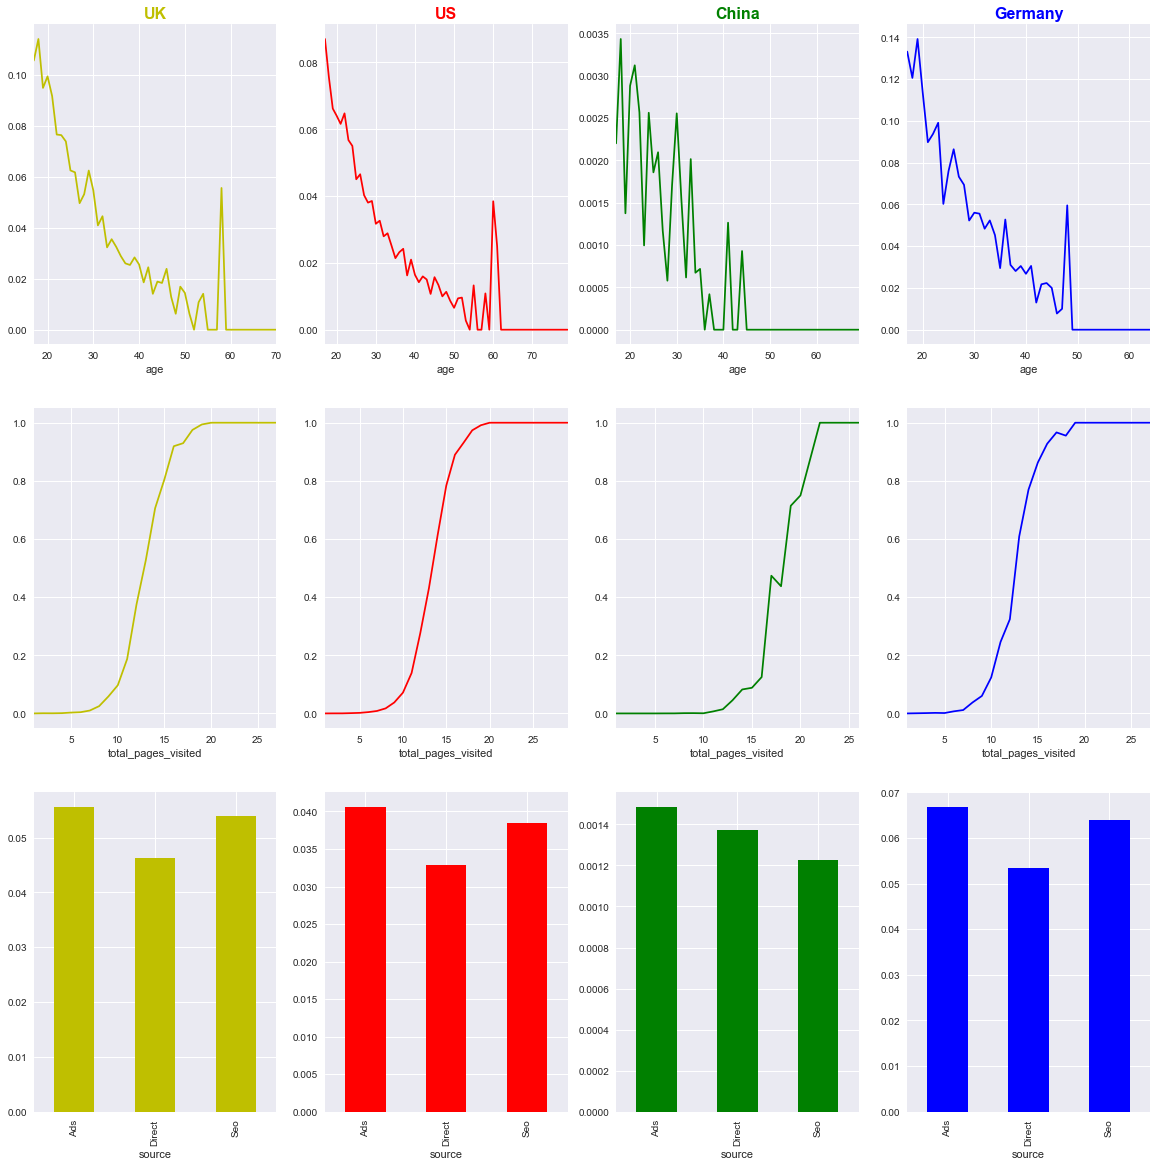

In [135]:
columns = ["age", "total_pages_visited", "source"]
typeOfGraph = {"age": "line", "total_pages_visited": "line", "source": "bar"}
countries = conversionDataFrame["country"].unique()
countryColor = ["y", "r", "g", "b"]
fig, axes = plt.subplots(3, 4, figsize=(20, 20))

for i, country in enumerate(countries):
    axes[0][i].set_title(country, fontweight="bold", fontsize=16, color=countryColor[i])

for i, country in enumerate(conversionDataFrame["country"].unique()):
    for j, column in enumerate(columns):
        conversionDataFrame[conversionDataFrame["country"] == country].groupby([column])["converted"].mean().plot(kind=typeOfGraph[column], ax=axes[j][i], color=countryColor[i])
        


It looks like things are pretty similar across countries.  China is erratic with respec to age, but that may be a sample size issue.